# 3D Deconvolution of cell images

In this notebook we shall explore the deconvolution of 3D images using the python module  Flowdec: https://pypi.org/project/flowdec/

We shall use Lucy-Richardson algorithm. It is an iterative method of recovering the underlying image that has been blurred by a **known Point spread function**. Learn more about the algorithm on https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution.

In [ ]:
!pip install flowdec

     |████████████████████████████████| 4.4MB 8.1MB/s 


In [ ]:
!pip install scikit-image==0.18.0

     |████████████████████████████████| 29.2MB 121kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from flowdec.nb import utils as nbutils 
from skimage import io, util,exposure
from scipy import ndimage,signal
from scipy.stats import describe
from skimage.exposure import rescale_intensity, histogram, adjust_gamma
from flowdec import data as fd_data
from skimage.data import cells3d
from flowdec import restoration as fd_restoration

In [ ]:
#import the nuclei images from cells3d
image = util.img_as_float(cells3d()[:, 1, :, :])
print("shape: ",image.shape)

shape:  (60, 256, 256)


In [ ]:
#create the covolution kernel to blur
kernel = np.zeros_like(image)
for offset in [0, 1]:
    kernel[tuple((np.array(kernel.shape) - offset) // 2)] = 1
kernel = ndimage.gaussian_filter(kernel, sigma=1.)
kernel.shape
image= signal.fftconvolve(image, kernel, mode='same')
print("shape of blurred image: ",image.shape)

shape of blurred image:  (60, 256, 256)


In [ ]:
#run the lucy richardson deoncolvolver on the blurred image
LucyR = fd_restoration.RichardsonLucyDeconvolver(image.ndim).initialize()
result = LucyR.run(fd_data.Acquisition(data=image, kernel=kernel), niter=30).data#

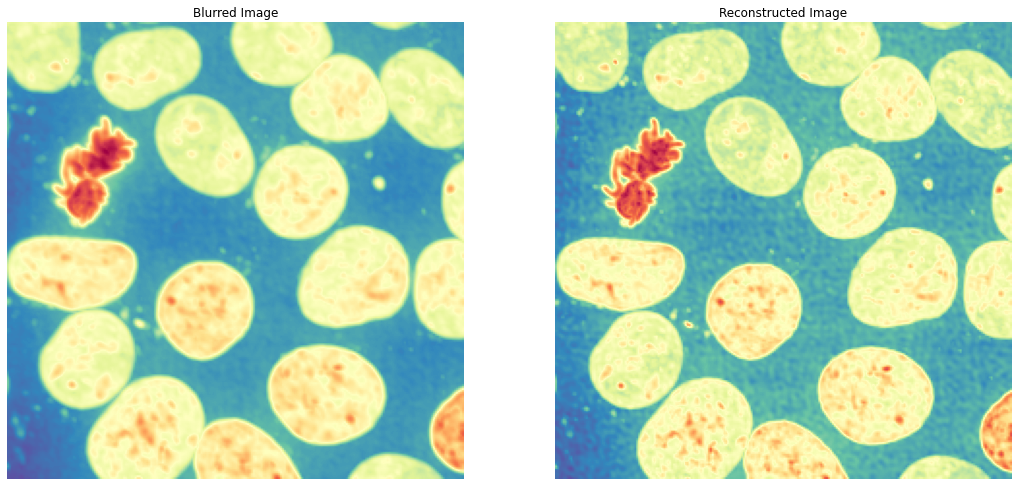

In [ ]:
#plot the results
fig, axs = plt.subplots(1, 2)
axs = axs.ravel()
fig.set_size_inches(18, 12)
center = tuple([slice(None), slice(10, -10), slice(10, -10)])
titles = ['Blurred Image', 'Reconstructed Image']
for i, d in enumerate([image, result]):
    img = exposure.adjust_gamma(d[center].max(axis=0), gamma=.2)
    axs[i].imshow(img, cmap='Spectral_r')
    axs[i].set_title(titles[i])
    axs[i].axis('off')